# Codificación de variables categóricas ordinales

En el conjunto de datos `datos_20.csv` existen datos  por localidad de grados académicos (`Grado`), población total (`POBTOT_BC`) y promedio de hijos nacidos vivos (`PROM_HNV_BC`); censados en el 2020.

Codificaremos la variable categórica y encontraremos un modelo lineal entre las variables `Grado` y `POBTOT_BC` con `PROM_HNV_BC`, veremos si la precisión del modelo varía con diferentes formas de codificar y si existe una correlación entre estas variables.

1. Importe los datos del archivo `datos_20.csv`

In [28]:
import pandas as pd 
df = pd.read_csv('datos_20.csv')
df

,Grado,POBTOT_BC,PROM_HNV_BC
0,Primaria,3.173729,1.154342
1,Primaria,5.278282,1.302897
2,Primaria,3.173729,1.759130
3,Primaria,5.221993,1.388040
4,Primaria,4.219874,1.420656
...,...,...,...
105492,Primaria trunca,3.037064,1.540916
105493,Primaria trunca,2.234823,2.071155
105494,Primaria,3.716448,1.699794
105495,Primaria,4.123288,1.781686


2. Codifique la variable `Grado` usando contraste polinómico lineal

In [38]:
#Definir los niveles de la variable Grados 
niveles_grado = df['Grado'].unique()

_dict = {
    'Sin escolaridad':-2,
    'Primaria trunca':-1,
    'Primaria':0,
    'Secundaria':1,
    'Preparatoria':2,
    'Licenciatura o superior':3
}

df['Grado_linCod']=df['Grado'].map(_dict)
df

,Grado,POBTOT_BC,PROM_HNV_BC,Grado_linCod
0,Primaria,3.173729,1.154342,0
1,Primaria,5.278282,1.302897,0
2,Primaria,3.173729,1.759130,0
3,Primaria,5.221993,1.388040,0
4,Primaria,4.219874,1.420656,0
...,...,...,...,...
105492,Primaria trunca,3.037064,1.540916,-1
105493,Primaria trunca,2.234823,2.071155,-1
105494,Primaria,3.716448,1.699794,0
105495,Primaria,4.123288,1.781686,0


3. Obtenga una relación lineal usando la clase `LinearRegression` del paquete `sklearn.linear_model`, para la codificacón obtenida y la variable `PBTOT_BC` como variables independientes y la variable `PROM_HNV_BC` como variable dependiente. Posteriormente, grafique y mida la correlación.

In [30]:
from sklearn.linear_model import LinearRegression

y=df['PROM_HNV_BC']
x=df[['Grado_linCod','POBTOT_BC']]

linear_model = LinearRegression()
linear_model.fit(x,y)

LinearRegression()

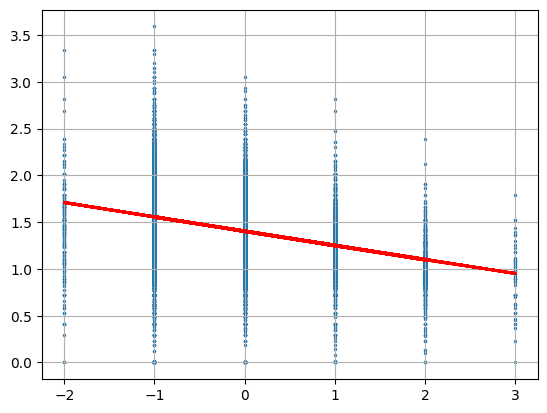

Correlación de Grado_linCod y PROM_HNV_BC: -0.372412663280555


In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df['Grado_linCod'], df['PROM_HNV_BC'], s=2)
plt.plot(df['Grado_linCod'], linear_model.predict(df[['Grado_linCod', 'POBTOT_BC']]), 'r')
plt.grid()

plt.show()

corr = df[['Grado_linCod', 'PROM_HNV_BC']].corr().iloc[0, 1]
print("Correlación de Grado_linCod y PROM_HNV_BC:", corr)

Una correlación positiva cercana a 1 indica una relación lineal positiva fuerte entre las variables.

Una correlación negativa cercana a -1 indica una relación lineal negativa fuerte entre las variables.

Una correlación cercana a 0 indica que no hay una relación lineal entre las variables.

En este caso, la correlación entre 'Grado_linCod' y 'PROM_HNV_BC' es aproximadamente -0.372, lo que indica una relación lineal negativa moderada entre estas dos variables. La interpretación sugerida es que, en este conjunto de datos, a medida que el grado de escolaridad aumenta, el promedio de hijos/nacimientos vivos disminuye en cierta medida.

4. Codifique de nuevo la variable `Grado` usando contrate polinómico cuadrático con una parábola cóncava.

In [39]:
mapeo_grado = {
    'Sin escolaridad': -5,
    'Primaria trunca': -4,
    'Primaria': -3,
    'Secundaria': -2,
    'Preparatoria': -1,
    'Licenciatura o superior': 0
}

df['Grado_cuadCod'] = (df['Grado'].map(mapeo_grado)) ** 2

df['Grado_cuadCod']

0          9
1          9
2          9
3          9
4          9
          ..
105492    16
105493    16
105494     9
105495     9
105496     9
Name: Grado_cuadCod, Length: 105497, dtype: int64

5. Obtenga de nuevo una regresión lineal incluyendo ahora la codificación cuadrática, es decir, las variables independientes serán `POBTOT_BC`, la codificación lineal y la codificación cuadrática. Grafique y mida la correlación, ¿Mejoró la correlación?

LinearRegression()


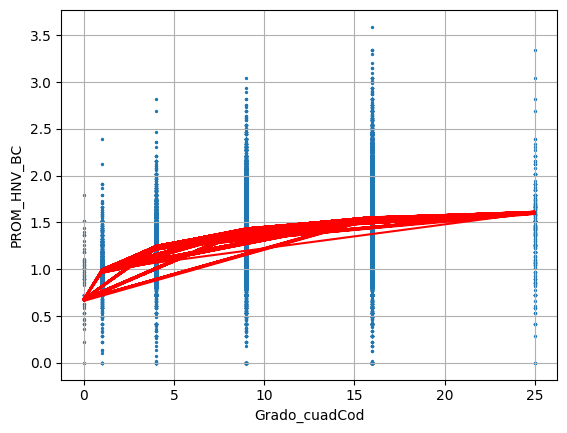

Correlación de Grado_cuadCod y PROM_HNV_BC: 0.35322698217729476


In [45]:
y=df['PROM_HNV_BC']
x=df[['Grado_linCod','Grado_cuadCod','POBTOT_BC']]

linear_model = LinearRegression()
print(linear_model.fit(x,y))


plt.scatter(df['Grado_cuadCod'], df['PROM_HNV_BC'], s=2)
plt.plot(df['Grado_cuadCod'], linear_model.predict(df[['Grado_linCod', 'Grado_cuadCod', 'POBTOT_BC']]), 'r')
plt.xlabel('Grado_cuadCod')
plt.ylabel('PROM_HNV_BC')
plt.grid()
plt.show()

corr = df[['Grado_cuadCod', 'PROM_HNV_BC']].corr().iloc[0, 1]
print("Correlación de Grado_cuadCod y PROM_HNV_BC:", corr)

No mejoro, pero cambió muy ligeramente, lo más notable es que cambio el sentido de su razón de cambio.

6. Finalmente, vuelva a codificar la variable `Grado` usando contraste polinómico cuadrático estrictamente creciente, esto es $X=\{0,1,2,\dots,n-1\}$.

In [46]:
_dict = {
    'Sin escolaridad': 0,
    'Primaria trunca': 1,
    'Primaria': 2,
    'Secundaria': 3,
    'Preparatoria': 4,
    'Licenciatura o superior': 5
}

df['Grado_cuadCod_Crec'] = df['Grado'].map(_dict) ** 2
df.tail()


,Grado,POBTOT_BC,PROM_HNV_BC,Grado_linCod,Grado_cuadCod,Grado_cuadCod_Crec
105492,Primaria trunca,3.037064,1.540916,-4,16,1
105493,Primaria trunca,2.234823,2.071155,-4,16,1
105494,Primaria,3.716448,1.699794,-3,9,4
105495,Primaria,4.123288,1.781686,-3,9,4
105496,Primaria,3.774494,1.863812,-3,9,4


7. En la última regresión lineal, las variables independientes serán solo `POBTOT_BC` y la codificación cuadrática creciente. Grafique y mida la correlación, ¿Mejoró la correlación?, ¿Existe correlación entre estas variables?

LinearRegression()


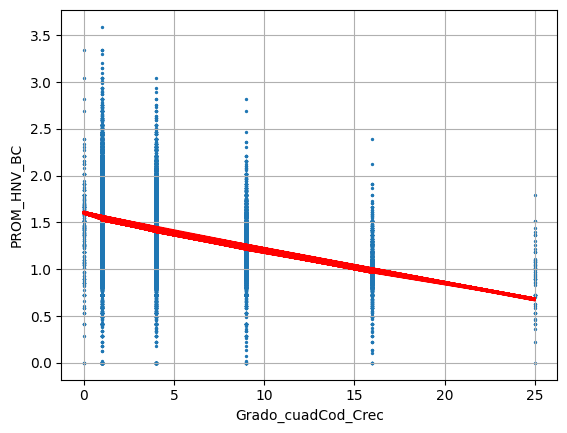

Correlación de Grado_cuadCod_Crec y PROM_HNV_BC: -0.38018591795520884


In [48]:
y=df['PROM_HNV_BC']
x=df[['Grado_linCod','Grado_cuadCod','POBTOT_BC','Grado_cuadCod_Crec']]

linear_model = LinearRegression()
print(linear_model.fit(x,y))


plt.scatter(df['Grado_cuadCod_Crec'], df['PROM_HNV_BC'], s=2)
plt.plot(df['Grado_cuadCod_Crec'], linear_model.predict(df[['Grado_linCod', 'Grado_cuadCod', 'POBTOT_BC','Grado_cuadCod_Crec']]), 'r')
plt.xlabel('Grado_cuadCod_Crec')
plt.ylabel('PROM_HNV_BC')
plt.grid()
plt.show()

corr = df[['Grado_cuadCod_Crec', 'PROM_HNV_BC']].corr().iloc[0, 1]
print("Correlación de Grado_cuadCod_Crec y PROM_HNV_BC:", corr)

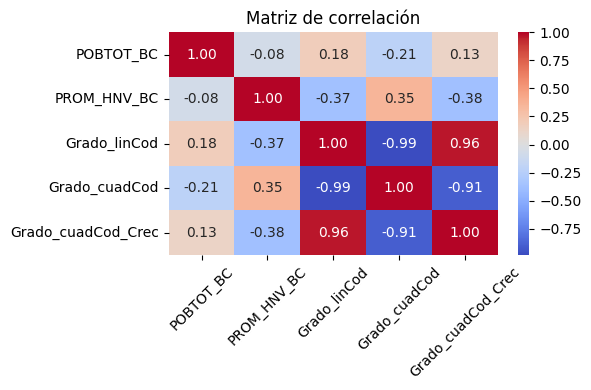

In [49]:
import seaborn as sns
correlation_matrix = df.copy()
correlation_matrix.drop('Grado', axis=1, inplace=True)
correlation_matrix = correlation_matrix.corr()

plt.figure(figsize=(6, 4)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de correlación')  
plt.xticks(rotation=45)  
plt.yticks(rotation=0) 
plt.tight_layout()  
plt.show() 

La correlación mejoro ligeramente, pero sí existe correlación entre las variables, principalmente entre la de grado cuadratico respecto a POBTOT_BC